In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define image size
IMAGE_SIZE = [224, 224]

In [3]:
# Define directories
train_directory = r"C:\Users\castr\OneDrive\Desktop\Image Classification\dataset\train"
test_directory = r"C:\Users\castr\OneDrive\Desktop\Image Classification\dataset\test"
val_directory = r"C:\Users\castr\OneDrive\Desktop\Image Classification\dataset\val"

In [4]:
# Load the saved model
saved_model_path = 'bird_species_densenet121.h5'
loaded_model = load_model(saved_model_path, compile=False)


In [5]:
# Define the labels
labels = {
    0: 'Crowned Pigeon',
    1: 'Green Imperial-Pigeon',
    2: 'Island Thrush',
    3: 'Philippine Coucal',
    4: 'Philippine Cuckoo-Dove',
    5: 'Philippine Eagle',
    6: 'Philippine Hawk-Eagle',
    7: 'Philippine Serpent Eagle',
    8: 'Philippine Turtle Dove',
    9: 'Philippine Wood Pigeon',
}

In [6]:
# Define data generators
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_directory,
    target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]),
    batch_size=1,  # Set batch size to 1 for prediction
    class_mode='categorical',  # Adjust if using different class mode
    shuffle=False  # Important to keep the order of predictions
)

Found 1377 images belonging to 10 classes.


In [7]:
# Make predictions on the test set
y_pred_prob = loaded_model.predict(test_set)
y_pred = np.argmax(y_pred_prob, axis=1)

1377/1377 [==============================] - 89s 63ms/step


In [8]:
# Get the true labels
y_true = test_set.classes

In [9]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

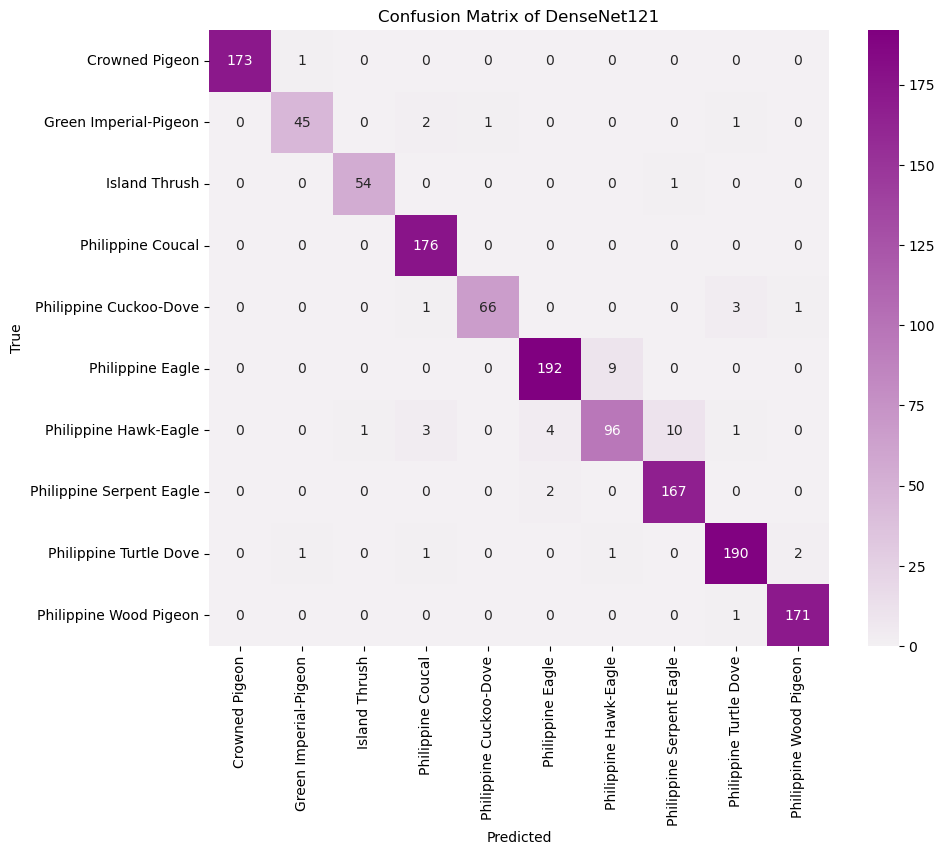

In [12]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap=sns.light_palette("purple", as_cmap=True), xticklabels=labels.values(), yticklabels=labels.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of DenseNet121')
plt.show()

In [13]:
# Display classification report
print(classification_report(y_true, y_pred, target_names=labels.values()))

                          precision    recall  f1-score   support

          Crowned Pigeon       1.00      0.99      1.00       174
   Green Imperial-Pigeon       0.96      0.92      0.94        49
           Island Thrush       0.98      0.98      0.98        55
       Philippine Coucal       0.96      1.00      0.98       176
  Philippine Cuckoo-Dove       0.99      0.93      0.96        71
        Philippine Eagle       0.97      0.96      0.96       201
   Philippine Hawk-Eagle       0.91      0.83      0.87       115
Philippine Serpent Eagle       0.94      0.99      0.96       169
  Philippine Turtle Dove       0.97      0.97      0.97       195
  Philippine Wood Pigeon       0.98      0.99      0.99       172

                accuracy                           0.97      1377
               macro avg       0.97      0.96      0.96      1377
            weighted avg       0.97      0.97      0.97      1377

